In [1]:
# Loading all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading the dataset of user 8
User8 = pd.read_csv('User8_BEHACOM.csv', encoding='latin1')

In [3]:
# Dropping the unnecessary columns
B = User8.drop(columns=['current_app', 'penultimate_app','USER', 'timestamp'])

In [4]:
# Defining training set
B_train = B

# Random scalar
x = 50 

# Defining the testing data        
B_test = B * x

In [5]:
# Scaling the sets
scaler = MinMaxScaler()

# The training data is fitted and transformed
B_train_scaled = scaler.fit_transform(B_train)

# The testing data is transformed
B_test_scaled = scaler.transform(B_test)

print(B_test_scaled)
print(B_train_scaled)

[[ 0.34129693  0.          0.         ...  1.81110359  0.75646527
   0.39678992]
 [ 8.02047782  4.87804878  4.5        ...  0.64319567  0.24968361
   0.1616215 ]
 [ 0.          0.          0.         ...  0.62626947  0.57517622
   0.59258418]
 ...
 [27.47440273  7.31707317  2.         ...  1.33716994  0.17142359
   0.44471445]
 [46.92832765 30.48780488  4.5        ...  0.05077861  0.06135187
   0.27848176]
 [21.84300341 21.95121951  7.         ...  2.23425863  0.04760595
   0.29544324]]
[[0.00682594 0.         0.         ... 0.03622207 0.01512931 0.0079358 ]
 [0.16040956 0.09756098 0.09       ... 0.01286391 0.00499367 0.00323243]
 [0.         0.         0.         ... 0.01252539 0.01150352 0.01185168]
 ...
 [0.54948805 0.14634146 0.04       ... 0.0267434  0.00342847 0.00889429]
 [0.93856655 0.6097561  0.09       ... 0.00101557 0.00122704 0.00556964]
 [0.43686007 0.43902439 0.14       ... 0.04468517 0.00095212 0.00590886]]


In [6]:
# Constructing the One Class SVM model
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)

In [7]:
# Fitting the model with the training data
model.fit(B_train_scaled)

OneClassSVM(nu=0.1)

In [8]:
# Deriving the decision function values
decisionf = model.decision_function(B_train_scaled)

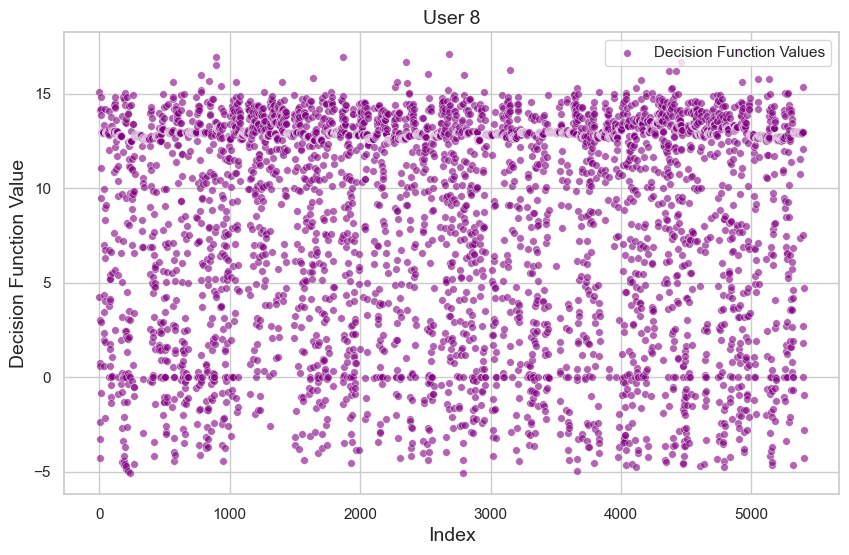

In [9]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

# Customising the plots
plt.title('User 8', fontsize=14)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()